In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv('adult_with_headers.csv')


In [3]:
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [4]:
print(df.describe())


                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [7]:
# Handling missing values

num_imputer = SimpleImputer(strategy='median')
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])


In [8]:
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df[numerical_cols]), columns=numerical_cols)


In [11]:
# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [12]:
df_standard_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [13]:
df_minmax_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [14]:
#Standard Scaling: Preferred for algorithms sensitive to variance (e.g., PCA, SVM).
#Min-Max Scaling: Suitable for distance-based algorithms (e.g., KNN, neural networks).


In [15]:
# categorical columns with <5 unique values
small_cat_cols = [col for col in categorical_cols if df[col].nunique() < 5]


In [16]:
df_one_hot_encoded = pd.get_dummies(df[small_cat_cols], drop_first=True)
df_one_hot_encoded.head()

,sex_ Male,income_ >50K
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


In [17]:
#categorical columns with ≥5 unique values
large_cat_cols = [col for col in categorical_cols if df[col].nunique() >= 5]


In [18]:
#Label Encoding
label_encoders = {}
for col in large_cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df[large_cat_cols].head()

,workclass,education,marital_status,occupation,relationship,race,native_country
0,7,9,4,1,1,4,39
1,6,9,2,4,0,4,39
2,4,11,0,6,1,4,39
3,4,1,2,6,0,2,39
4,4,9,2,10,5,2,5


In [19]:
#Pros of One-Hot Encoding: No ordinal relationships are assumed; suitable for tree-based models.
#Cons of One-Hot Encoding: Increases dimensionality.
#Pros of Label Encoding: Simplicity, efficient for high-cardinality features.
#Cons of Label Encoding: Assumes ordinal relationships that may not exist.

In [20]:
#"Feature Engineering.ipynb"
df['age_education_interaction'] = df['age'] * df['education_num']
df['long_work_hours'] = (df['hours_per_week'] > 40).astype(int)


In [21]:
df[['age_education_interaction', 'long_work_hours']].head()

,age_education_interaction,long_work_hours
0,507.0,0
1,650.0,0
2,342.0,0
3,371.0,0
4,364.0,0


In [22]:
#Log Transformation

import matplotlib.pyplot as plt

# skewed columns
skewness = df[numerical_cols].skew()
skewed_cols = skewness[skewness > 1].index
print("Skewed columns:\n", skewed_cols)


Skewed columns:
 Index(['fnlwgt', 'capital_gain', 'capital_loss'], dtype='object')


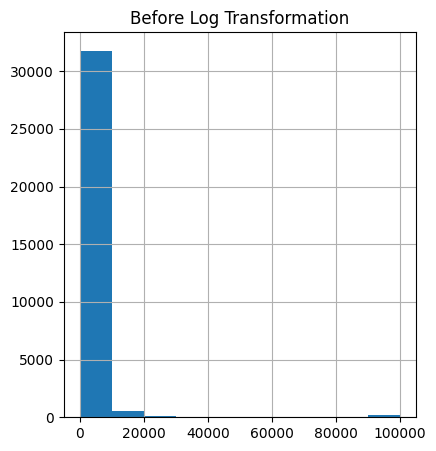

In [23]:
for col in skewed_cols:
    df[f'log_{col}'] = np.log1p(df[col])

# Plot before and after transformation for a sample column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['capital_gain'].hist()
plt.title('Before Log Transformation')
plt.show()

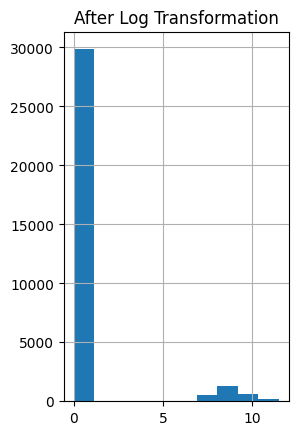

In [24]:
plt.subplot(1, 2, 2)
df['log_capital_gain'].hist()
plt.title('After Log Transformation')
plt.show()

In [25]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df[numerical_cols])
df_cleaned = df[outliers == 1]

In [26]:
df.shape

(32561, 20)

In [27]:
df_cleaned.shape

(32235, 20)

In [28]:
#Outliers can skew model results by affecting mean-based metrics like MSE or distorting decision boundaries. Removing them improves model generalization.


In [29]:
pip install ppscore


In [30]:
import ppscore as pps
# Compute PPS matrix
pps_matrix = pps.matrix(df_cleaned)

# Display top feature relationships
print("Top feature relationships based on PPS:\n", pps_matrix.sort_values(by='ppscore', ascending=False).head())


Top feature relationships based on PPS:
                  x              y  ppscore            case  is_valid_score  \
0              age            age      1.0  predict_itself            True   
210   capital_gain   capital_gain      1.0  predict_itself            True   
64       education  education_num      1.0      regression            True   
83   education_num      education      1.0      regression            True   
84   education_num  education_num      1.0  predict_itself            True   

                  metric  baseline_score  model_score                    model  
0                   None          0.0000          1.0                     None  
210                 None          0.0000          1.0                     None  
64   mean absolute error          1.8760          0.0  DecisionTreeRegressor()  
83   mean absolute error          2.7244          0.0  DecisionTreeRegressor()  
84                  None          0.0000          1.0                     None  
